# Table of Contents

    1. Introduction

    2. Dataset Preparation
    
    3. Exploratory Data Analysis

    4.  KNN

        4.1 
        4.2 
    

    5. SVD

            5.1. 
            5.2.
          

# 1. Introduction

# 2. Dataset Preparation

In [1]:
# Import libraries 
import numpy as np
import pandas as pd 
import semopy 
import seaborn as sns 
import matplotlib.pyplot as plt
import researchpy as rp
import math
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats import power as pwr
from statsmodels.stats.outliers_influence import variance_inflation_factor
import IPython
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import glob, os
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

from IPython.display import display
pd.set_option('display.max_columns', None)

In [2]:
# DataFrame to store all imported data
if not os.path.isfile('data.csv'):
    data = open('data.csv', mode='w')

files = ['combined_data_1.txt',
         'combined_data_2.txt',
#          'combined_data_3.txt',  
#          'combined_data_4.txt'
        ]


# Combine all data files into a csv file
for file in files:
  print("Opening file: {}".format(file))
  with open(file) as f:
    for line in f:
        line = line.strip()
        if line.endswith(':'):
            movie_id = line.replace(':', '')
        else:
            data.write(movie_id + ',' + line)
            data.write('\n')
data.close()


Opening file: combined_data_1.txt


NameError: name 'data' is not defined

In [2]:

# Read all data into a pd dataframe
df = pd.read_csv('data.csv', names=['movie_id', 'user_id','rating','date'])
print(df.nunique())
df

movie_id      1336
user_id     431600
rating           5
date          2176
dtype: int64


,movie_id,user_id,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03
...,...,...,...,...
6847045,1336,1091336,3,2004-12-21
6847046,1336,1299822,2,2004-12-29
6847047,1336,1875356,4,2005-01-12
6847048,1336,1979820,2,2005-01-22


In [3]:
df.isnull().sum()

movie_id    0
user_id     0
rating      0
date        0
dtype: int64

In [4]:
# Load data for  movie titles
movie_titles = pd.read_csv('movie_titles.txt', 
                           encoding = 'ISO-8859-1', 
                           header = None, 
                           names = ['movie_id', 'YearOfRelease', 'movie_title'], on_bad_lines='skip')

print('Shape Movie-Titles:\t{}'.format(movie_titles.shape))
movie_titles.head(5)

Shape Movie-Titles:	(17434, 3)


,movie_id,YearOfRelease,movie_title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [5]:
movie_titles.isnull().sum() #There are 7 empty cells in year of release
movie_titles['YearOfRelease'] = movie_titles['YearOfRelease'].fillna(0)


In [6]:
movie_titles['YearOfRelease'] = movie_titles['YearOfRelease'].astype(int)


In [7]:
df=pd.merge(df,movie_titles,on='movie_id')

In [9]:
df.head()

,movie_id,user_id,rating,date,YearOfRelease,movie_title
0,1,1488844,3,2005-09-06,2003,Dinosaur Planet
1,1,822109,5,2005-05-13,2003,Dinosaur Planet
2,1,885013,4,2005-10-19,2003,Dinosaur Planet
3,1,30878,4,2005-12-26,2003,Dinosaur Planet
4,1,823519,3,2004-05-03,2003,Dinosaur Planet


# 3. Exploratory Data Analysis

graph1

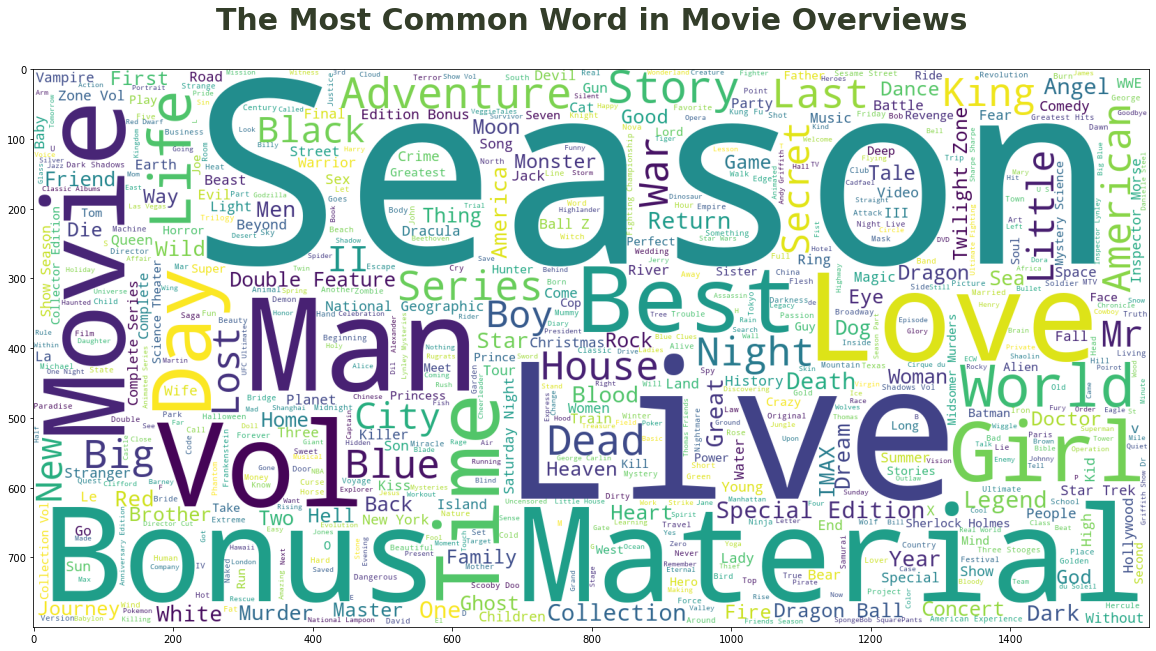

In [10]:
plt.figure(figsize=(20,20))
plt.title('The Most Common Word in Movie Overviews\n', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(movie_titles['movie_title']))

plt.imshow(wc)

graph2

Text(0.5, 1.0, 'Total Released Movie by Date')

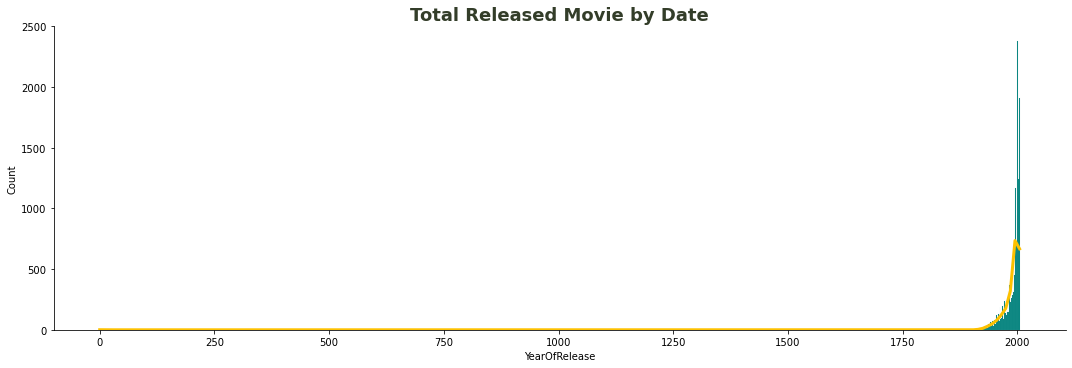

In [11]:
sns.displot(data=movie_titles, x='YearOfRelease', kind='hist', kde=True,
            color='#fdc100', facecolor='#06837f', edgecolor='#64b6ac', line_kws={'lw': 3}, aspect=3)
plt.title('Total Released Movie by Date', fontsize=18, weight=600, color='#333d29')

# 4. KNN

In [12]:
"""
min_movie = 100   # movie has to have been rated over 100 times
min_user = 100   # user has to have rated at least 100 times
users = df.groupby('user_id')['rating'].count()
users = users.loc[users > min_user].index.values
movies = df.groupby('movie_id')['rating'].count()
movies = movies.loc[movies > min_movie].index.values
df_filtered = df.loc[df.user_id.isin(users) & df.movie_id.isin(movies)]
"""

"\nmin_movie = 100   # movie has to have been rated over 100 times\nmin_user = 100   # user has to have rated at least 100 times\nusers = df.groupby('user_id')['rating'].count()\nusers = users.loc[users > min_user].index.values\nmovies = df.groupby('movie_id')['rating'].count()\nmovies = movies.loc[movies > min_movie].index.values\ndf_filtered = df.loc[df.user_id.isin(users) & df.movie_id.isin(movies)]\n"

In [13]:
df_filtered = df[df['movie_id'] <= 1000]

In [14]:
df_filtered

,movie_id,user_id,rating,date,YearOfRelease,movie_title
0,1,1488844,3,2005-09-06,2003,Dinosaur Planet
1,1,822109,5,2005-05-13,2003,Dinosaur Planet
2,1,885013,4,2005-10-19,2003,Dinosaur Planet
3,1,30878,4,2005-12-26,2003,Dinosaur Planet
4,1,823519,3,2004-05-03,2003,Dinosaur Planet
...,...,...,...,...,...,...
4986387,1000,1954284,5,2005-05-04,2002,Jim Breuer: Hardcore
4986388,1000,299636,2,2005-10-27,2002,Jim Breuer: Hardcore
4986389,1000,1635449,1,2005-01-10,2002,Jim Breuer: Hardcore
4986390,1000,906984,4,2005-05-13,2002,Jim Breuer: Hardcore


In [15]:
print('Unfiltered: ', df.shape[0])
print('Filtered: ', df_filtered.shape[0])
print('Kept {}% of data'.format(round(df_filtered.shape[0]/df.shape[0], 2)*100))

Unfiltered:  6813310
Filtered:  4986392
Kept 73.0% of data


In [16]:
# Split the dataset into train and test sets
train_data, test_data = train_test_split(df_filtered, test_size=0.2, random_state=42)

In [17]:
movie_user=train_data.pivot(index='user_id', columns= 'movie_id',values='rating').fillna(0)
movie_user.head()

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,671,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,828,829,830,831,832,833,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [18]:
# Preprocess the data into a sparse matrix format
csrtrain = csr_matrix(movie_user.values)

In [19]:
# Define the parameter grid for grid search
"""
param_grid = {'n_neighbors': [10, 20, 30],
              'algorithm': ['brute'],
              'metric': ['cosine', 'euclidean']}

# Perform grid search with cross-validation
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')
grid_search.fit(csrtrain,csrtrain)
"""

"\nparam_grid = {'n_neighbors': [10, 20, 30],\n              'algorithm': ['brute'],\n              'metric': ['cosine', 'euclidean']}\n\n# Perform grid search with cross-validation\nknn = KNeighborsRegressor()\ngrid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')\ngrid_search.fit(csrtrain,csrtrain)\n"

In [20]:

# Train a KNN model with the best hyperparameters
knn2 = NearestNeighbors(n_neighbors=10,
                           algorithm='brute',
                           metric='cosine')
knn2.fit( csrtrain)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

# Recommending Movie to Random User

In [35]:
user_ids = train_data['user_id'].unique()
user_ids.sort()
user_ids=user_ids.tolist()
random_user_id= np.random.choice(user_ids)
index = user_ids.index(random_user_id)
print ('Randomly selected user id: ', random_user_id)



Randomly selected user id:  1278589


In [36]:
distances, indices = knn2.kneighbors(movie_user.iloc[index,:].values.reshape(1,-1), n_neighbors=10)

In [37]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print('Recommandations for User',str(random_user_id),' \n')
    else:
        print( 'Most Similar User',i,': User_Id ' +  str(movie_user.index[indices.flatten()[i]]),' with distance of ',str(distances.flatten()[i])  )


Recommandations for User 1278589  

Most Similar User 1 : User_Id 651102  with distance of  0.3940682261824062
Most Similar User 2 : User_Id 478600  with distance of  0.3989512038300862
Most Similar User 3 : User_Id 927734  with distance of  0.41200299548430963
Most Similar User 4 : User_Id 649322  with distance of  0.41755246688330006
Most Similar User 5 : User_Id 2127722  with distance of  0.42096902781760415
Most Similar User 6 : User_Id 1738820  with distance of  0.4288820016330739
Most Similar User 7 : User_Id 770253  with distance of  0.43521750527509484
Most Similar User 8 : User_Id 1183833  with distance of  0.4363687683195734
Most Similar User 9 : User_Id 680520  with distance of  0.44259263306846064


In [38]:
mostsimilarusermovies = train_data[train_data['user_id'] ==movie_user.index[indices.flatten()[1]]]
mostsimilarusermovies

,movie_id,user_id,rating,date,YearOfRelease,movie_title
4252810,819,651102,3,2005-11-20,1998,The Faculty
825923,197,651102,2,2005-11-11,2004,Taking Lives
1459751,305,651102,4,2005-11-20,1996,Jack
4132550,798,651102,4,2005-11-11,1975,Jaws
4680605,937,651102,4,2005-11-20,1998,Fallen
3851842,751,651102,3,2005-11-20,1998,Halloween: H2O
727656,191,651102,4,2005-12-06,2003,X2: X-Men United
1815614,334,651102,4,2005-11-13,2005,The Pacifier
2662717,483,651102,5,2005-11-11,2001,Rush Hour 2
4841915,985,651102,4,2005-11-29,1999,The Mummy


In [39]:
similaruser=[]
movies_watchedbysimilarusers=[]


for i in range(0,len(distances.flatten())):
    
    similaruser.append(movie_user.index[indices.flatten()[i]])


In [40]:

# filter the data to only include rows for the selected user ID
similaruser_data = train_data[train_data["user_id"].isin(similaruser)]
similaruser_data

,movie_id,user_id,rating,date,YearOfRelease,movie_title
2286120,442,2127722,5,2004-10-24,1988,Mississippi Burning
421480,118,927734,5,2005-08-29,1985,Rambo: First Blood Part II
4388256,862,2127722,4,2003-05-06,2002,Tuck Everlasting
4252810,819,651102,3,2005-11-20,1998,The Faculty
1466306,305,1278589,3,2004-12-04,1996,Jack
...,...,...,...,...,...,...
812304,191,1738820,5,2004-11-21,2003,X2: X-Men United
3001788,564,680520,5,2005-09-15,1990,Predator 2
2659167,483,1183833,5,2005-01-30,2001,Rush Hour 2
4692125,937,478600,4,2004-12-21,1998,Fallen


In [41]:
similaruser_data['avg_ranking']  = similaruser_data.groupby('movie_id')['rating'].transform('mean')


/var/folders/y7/_v7_fsx55jngwk83d1p07t8r0000gn/T/ipykernel_873/2970884175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similaruser_data['avg_ranking']  = similaruser_data.groupby('movie_id')['rating'].transform('mean')


In [42]:
similaruser_data

,movie_id,user_id,rating,date,YearOfRelease,movie_title,avg_ranking
2286120,442,2127722,5,2004-10-24,1988,Mississippi Burning,5.000000
421480,118,927734,5,2005-08-29,1985,Rambo: First Blood Part II,4.333333
4388256,862,2127722,4,2003-05-06,2002,Tuck Everlasting,4.000000
4252810,819,651102,3,2005-11-20,1998,The Faculty,4.000000
1466306,305,1278589,3,2004-12-04,1996,Jack,3.800000
...,...,...,...,...,...,...,...
812304,191,1738820,5,2004-11-21,2003,X2: X-Men United,4.555556
3001788,564,680520,5,2005-09-15,1990,Predator 2,5.000000
2659167,483,1183833,5,2005-01-30,2001,Rush Hour 2,4.400000
4692125,937,478600,4,2004-12-21,1998,Fallen,4.166667


In [53]:
# Movies watched by similar users and not watched by selected random user

moviesfromsimilarusers= similaruser_data[["movie_id",'movie_title','avg_ranking']].drop_duplicates(subset=['movie_id'])

movieswatchedbyselecteduser=train_data[(train_data['user_id'] == random_user_id)]['movie_title'].tolist()

moviesfromsimilarusers = moviesfromsimilarusers[~moviesfromsimilarusers['movie_title'].isin(movieswatchedbyselecteduser)]

moviesfromsimilarusers


,movie_id,movie_title,avg_ranking
2286120,442,Mississippi Burning,5.000000
4388256,862,Tuck Everlasting,4.000000
91083,28,Lilo and Stitch,5.000000
3135781,571,American Beauty,4.000000
825923,197,Taking Lives,2.666667
1940849,357,House of Sand and Fog,4.000000
3501705,674,Hellbound: Hellraiser II,4.000000
2786132,494,Monty Python's The Meaning of Life: Special Ed...,5.000000
2167739,406,Hostage,4.000000
4559105,886,Ray,4.500000


In [54]:
movieidlist=moviesfromsimilarusers["movie_id"].tolist()
ranklist= moviesfromsimilarusers["avg_ranking"].tolist()
titlelist= moviesfromsimilarusers["movie_title"].tolist()

In [59]:
maxrating=0


for i in range(0,len(movieidlist)):
   if (ranklist[i]>= maxrating):
      
         recommended_movie=titlelist[i]
         maxrating=ranklist[i]
      

print('For User ',random_user_id, 'recommended movie is: ', recommended_movie,' \n', ' with Rating by Similar Users: ' , moviesfromsimilarusers[(moviesfromsimilarusers['movie_title'] == recommended_movie)]['avg_ranking'].iloc[0],' \n', ' with General Rating: ' , round(train_data[(train_data['movie_title'] == recommended_movie)].groupby('movie_id')['rating'].transform('mean').iloc[0],1))



For User  1278589 recommended movie is:  The Matrix: Revolutions  
  with Rating by Similar Users:  5.0  
  with General Rating:  3.5
